In [1]:
%pip install emoji pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import emoji

In [3]:
# Charger les fichiers Excel
comments_df = pd.read_excel('Data/Comments.xlsx')

# Afficher DataFrame "Comments"
comments_df

,ID Post,User Name,Comments,Sentiments
0,1,Samir Bekhouche,NaN,Neutre
1,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة ! فليكسيت 100 دج و...,Negatif
2,1,Jj Kie,كل عام و انتم بخير,Positif
3,1,Sakou Younes,كل عام وأنتم بخير,Positif
4,1,راني نعاني,كل عام وحنا بخير,Positif
...,...,...,...,...
4124,183,Ĺã Rõsë Ýb,❤️❤️,Positif
4125,183,نسمات هادئة,💕💕💕💕,Positif
4126,183,ملك ملهاش غيرك,❤❤❤❤❤❤🌹,Positif
4127,183,سعيدي رضا,NaN,Neutre


In [4]:
# Charger les fichiers Excel
posts_df = pd.read_excel('Data/Posts.xlsx')

# Afficher DataFrame "Posts"
posts_df

,ID,Contents,Lien Post,Nb Like,Nb Love,Nb Care,Nb Wow,Nb Sad,Nb Angry,Nb Haha,Company,Date
0,1,جازي تتمنّى لكم سنة سعيدة🥰\n#DJEZZY #HAPPY_NEW...,https://www.facebook.com/djezzy/posts/78822751...,272,45,0,1,1,76,14,Djezzy,2024-01-01
1,2,راك en panne و خصك رصيد ؟\nمع خدمة Tranquilo ت...,https://www.facebook.com/watch/?v=106882928102...,255,28,0,1,0,12,31,Djezzy,2024-01-04
2,3,It's Time To be a legend,https://www.facebook.com/djezzy/posts/39256499...,257,51,2,0,0,2,8,Djezzy,2024-01-10
3,4,Djezzy vous souhaite Yennayer amervuh! ⴰⵙⵙⴻⴳⴰ...,https://www.facebook.com/share/p/19UDNBoQ1k/,621,231,10,3,0,1,300,Djezzy,2024-01-11
4,5,قريباً ...,https://www.facebook.com/share/v/12B9LZySBRe/,288,49,4,0,0,3,24,Djezzy,2024-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,إثارة الألعاب تتعاش مع الأحباب، خاصة كي Ooredo...,https://www.facebook.com/share/p/1KGHZQuXex/,208,46,6,0,0,0,1,Ooredoo,2024-03-26
179,180,مع Ooredoo ديما رابحين !\nوجّدنا لكم حاجة جديد...,https://www.facebook.com/share/v/1Bc7FtdDPx/,625,125,14,0,1,1,1,Ooredoo,2024-03-27
180,181,عشنا مع بعض أجواء رمضانية رائعة من خلال الإفطا...,https://www.facebook.com/reel/954679512980806,280,40,7,1,1,0,0,Ooredoo,2024-03-28
181,182,ضاعفوا اشتراك الإنترنت الخاص بكم خلال شهر رمضا...,https://www.facebook.com/watch/?v=193245186050...,148,35,3,0,0,2,0,Ooredoo,2024-03-28


In [5]:
# Suppression des lignes où "User Name" est "Djezzy", "Mobilis" ou "Ooredoo"
comments_df = comments_df[~comments_df["User Name"].isin(["Djezzy", "Mobilis", "Ooredoo Algérie"])]
comments_df

,ID Post,User Name,Comments,Sentiments
0,1,Samir Bekhouche,NaN,Neutre
1,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة ! فليكسيت 100 دج و...,Negatif
2,1,Jj Kie,كل عام و انتم بخير,Positif
3,1,Sakou Younes,كل عام وأنتم بخير,Positif
4,1,راني نعاني,كل عام وحنا بخير,Positif
...,...,...,...,...
4124,183,Ĺã Rõsë Ýb,❤️❤️,Positif
4125,183,نسمات هادئة,💕💕💕💕,Positif
4126,183,ملك ملهاش غيرك,❤❤❤❤❤❤🌹,Positif
4127,183,سعيدي رضا,NaN,Neutre


In [6]:
comments_df = comments_df.dropna(subset=["Comments"])
comments_df = comments_df[comments_df["Comments"].str.strip() != ""]
comments_df

,ID Post,User Name,Comments,Sentiments
1,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة ! فليكسيت 100 دج و...,Negatif
2,1,Jj Kie,كل عام و انتم بخير,Positif
3,1,Sakou Younes,كل عام وأنتم بخير,Positif
4,1,راني نعاني,كل عام وحنا بخير,Positif
5,1,Wahab Ziadi,كل عام وحنا بخير,Positif
...,...,...,...,...
4123,183,مر سلين 'ے,🩷🩷🩷🩷🩷🩷,Positif
4124,183,Ĺã Rõsë Ýb,❤️❤️,Positif
4125,183,نسمات هادئة,💕💕💕💕,Positif
4126,183,ملك ملهاش غيرك,❤❤❤❤❤❤🌹,Positif


In [7]:
comments_df = comments_df.loc[comments_df["Comments"].shift() != comments_df["Comments"]]
comments_df

,ID Post,User Name,Comments,Sentiments
1,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة ! فليكسيت 100 دج و...,Negatif
2,1,Jj Kie,كل عام و انتم بخير,Positif
3,1,Sakou Younes,كل عام وأنتم بخير,Positif
4,1,راني نعاني,كل عام وحنا بخير,Positif
6,1,أحمد فيراس,🥰,Positif
...,...,...,...,...
4123,183,مر سلين 'ے,🩷🩷🩷🩷🩷🩷,Positif
4124,183,Ĺã Rõsë Ýb,❤️❤️,Positif
4125,183,نسمات هادئة,💕💕💕💕,Positif
4126,183,ملك ملهاش غيرك,❤❤❤❤❤❤🌹,Positif


In [8]:
def normalize_arabic(text):
    text = text.lower()
    text = re.sub("گ", "ك", text)
    text = re.sub("ڭ", "ك", text)
    text = re.sub("ڤ", "ق", text)
    text = re.sub("ڨ", "ق", text)
    text = re.sub("پ", "ب", text)
    text = re.sub("é", "e", text)
    text = re.sub("ê", "e", text)
    text = re.sub("ë", "e", text)
    text = re.sub("ç", "c", text)
    text = re.sub("à", "a", text)
    text = re.sub("â", "a", text)
    text = re.sub("ä", "a", text)
    text = re.sub("î", "i", text)
    text = re.sub("ï", "a", text)
    text = re.sub("æ", "ae", text)
    text = re.sub("œ", "oe", text)
    return text
"""
def replace_emojis(text):
    emojis = {
        "\U0001F601": "فرح",
        "\U0001F602": "فرح",
        "\U0001F603": "فرح",
        "\U0001F604": "فرح",
        "\U0001F606": "فرح",
        "\U0001F607": "فرح",
        "\U0001F60D": "حب",
        "\U0001F618": "حب",
        "\U0001F619": "حب",
        "\U0001F61A": "حب",
        "\U0001F61E": "حزن",
        "\U0001F61F": "حزن",
        "\U0001F620": "غضب",
        "\U0001F621": "غضب",
        "\U0001F92C": "غضب",
        "\U0001F636": "صمت",
        "\U0001F637": "مرض",
        "\U0001F638": "فرح",
        "\U0001F639": "ضحك",
        "\U0001F63B": "حب",
        "\U0001F63C": "فرح",
        "\U0001F63D": "حب",
        "\U0001F63E": "غضب",
        "\U0001F63F": "حزن",
        "\U0001F640": "حزن",
        "\U0001F641": "حزن",
        "\U0001F64B": "تحية",
        "\U0001F64E": "حزن",
        "\U0001FA79": "حب",
        "\U0001F970": "إعجاب",
        "\U00002764": "حب",
        "\U0001F495": "حب",
        "\U0001F339": "حب",
    }
    for emoji, arabic_equivalent in emojis.items():
        # Ajouter un espace après chaque remplacement
        text = re.sub(emoji, f" {arabic_equivalent} ", text)
    return text.strip()
"""

# Appliquer la normalisation
comments_df["Comments"] = comments_df["Comments"].apply(normalize_arabic)
posts_df["Contents"] = posts_df["Contents"].apply(normalize_arabic)

"""
comments_df["Comments"] = comments_df["Comments"].apply(replace_emojis)
posts_df["Contents"] = posts_df["Contents"].apply(replace_emojis)
"""

C:\Users\kikoo\AppData\Local\Temp\ipykernel_17412\1392052614.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df["Comments"] = comments_df["Comments"].apply(normalize_arabic)


'\ncomments_df["Comments"] = comments_df["Comments"].apply(replace_emojis)\nposts_df["Contents"] = posts_df["Contents"].apply(replace_emojis)\n'

In [9]:
comments_df

,ID Post,User Name,Comments,Sentiments
1,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة ! فليكسيت 100 دج و...,Negatif
2,1,Jj Kie,كل عام و انتم بخير,Positif
3,1,Sakou Younes,كل عام وأنتم بخير,Positif
4,1,راني نعاني,كل عام وحنا بخير,Positif
6,1,أحمد فيراس,🥰,Positif
...,...,...,...,...
4123,183,مر سلين 'ے,🩷🩷🩷🩷🩷🩷,Positif
4124,183,Ĺã Rõsë Ýb,❤️❤️,Positif
4125,183,نسمات هادئة,💕💕💕💕,Positif
4126,183,ملك ملهاش غيرك,❤❤❤❤❤❤🌹,Positif


In [10]:
posts_df

,ID,Contents,Lien Post,Nb Like,Nb Love,Nb Care,Nb Wow,Nb Sad,Nb Angry,Nb Haha,Company,Date
0,1,جازي تتمنّى لكم سنة سعيدة🥰\n#djezzy #happy_new...,https://www.facebook.com/djezzy/posts/78822751...,272,45,0,1,1,76,14,Djezzy,2024-01-01
1,2,راك en panne و خصك رصيد ؟\nمع خدمة tranquilo ت...,https://www.facebook.com/watch/?v=106882928102...,255,28,0,1,0,12,31,Djezzy,2024-01-04
2,3,it's time to be a legend,https://www.facebook.com/djezzy/posts/39256499...,257,51,2,0,0,2,8,Djezzy,2024-01-10
3,4,djezzy vous souhaite yennayer amervuh! ⴰⵙⵙⴻⴳⴰ...,https://www.facebook.com/share/p/19UDNBoQ1k/,621,231,10,3,0,1,300,Djezzy,2024-01-11
4,5,قريباً ...,https://www.facebook.com/share/v/12B9LZySBRe/,288,49,4,0,0,3,24,Djezzy,2024-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,إثارة الألعاب تتعاش مع الأحباب، خاصة كي ooredo...,https://www.facebook.com/share/p/1KGHZQuXex/,208,46,6,0,0,0,1,Ooredoo,2024-03-26
179,180,مع ooredoo ديما رابحين !\nوجّدنا لكم حاجة جديد...,https://www.facebook.com/share/v/1Bc7FtdDPx/,625,125,14,0,1,1,1,Ooredoo,2024-03-27
180,181,عشنا مع بعض أجواء رمضانية رائعة من خلال الإفطا...,https://www.facebook.com/reel/954679512980806,280,40,7,1,1,0,0,Ooredoo,2024-03-28
181,182,ضاعفوا اشتراك الإنترنت الخاص بكم خلال شهر رمضا...,https://www.facebook.com/watch/?v=193245186050...,148,35,3,0,0,2,0,Ooredoo,2024-03-28


In [34]:
def clean_text(text):
    text = emoji.replace_emoji(text, replace=" ")  # Supprimer les emojis
    text = re.sub(r'http\S+ | htps\S+', " ", str(text))  # Supprimer les hyperliens
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', " ", str(text))  # Supprimer les URL
    text = re.sub(r'@\S+', '', str(text))  # Supprimer les mots commençant par @
    text = text.replace("_", " ").replace("#", "")  # Supprimer # et _
    text = text.replace("'", " ")  # Supprimer '
    text = re.sub(r'\. | , | ، | ؛', " ", text)  # Supprimer les ponctuations
    
    # Supprimer les mots réservés
    text = re.sub(r'\bRT\b | \bRetweeted\b', " ", text)

    # Supprimer tout caractère spécial sauf l'alphabet arabe et latin
    text = re.sub(r'[^a-zA-Z0-9\u0600-\u06FF\s]', " ", text)
        
    # Supprimer les voyelles courtes arabes (حركات)
    harakat = "[\u064B-\u0652]"  # Comprend
    text = re.sub(harakat, '', text)

    text = re.sub(r"(.)\1{2,}", r"\1", text)  # Supprimer les caractères consécutifs en double
    text = text.replace('\n', " ").replace('/', " ")  # Supprimer sauts de ligne et /
    text = re.sub(r'[^\w\s]', " ", text)  # Supprimer les caractères spéciaux

    return text.strip()

comments_df["Comments"] = comments_df["Comments"].apply(clean_text)
posts_df["Contents"] = posts_df["Contents"].apply(clean_text)

# Remplacer les valeurs nulles par une chaîne vide
comments_df["Comments"] = comments_df["Comments"].fillna('')
posts_df["Contents"] = posts_df["Contents"].fillna('')

comments_df = comments_df.dropna(subset=["Comments"])
comments_df = comments_df[comments_df["Comments"].str.strip() != ""]

In [35]:
comments_df

,ID Post,User Name,Comments,Sentiments,Sentiment_Predicted
1,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة تعبئة 100 دج و بدأ...,Negatif,Negatif
2,1,Jj Kie,كل عام و انتم بخير,Positif,Positif
3,1,Sakou Younes,كل عام وأنتم بخير,Positif,Neutre
4,1,راني نعاني,كل عام وحنا بخير,Positif,Positif
7,1,مروان سيدهم سيدهم مروان,كل عام وأنتم بخير وأتمنا رد لماذا اسئلة لماذا ...,Positif,Neutre
...,...,...,...,...,...
4102,183,Kà Nø,اصلحوا انترنت الا العاب خسرت كم من بارطيا من أ...,Negatif,Negatif
4105,183,Noé Noé,رمضان كريم,Positif,Positif
4114,183,Koléa Koléa,رمضان كريم,Positif,Positif
4120,183,Oussama Zhm,walah connexion ta3koum rahi t3ayi lyamat hado...,Negatif,Negatif


In [13]:
posts_df

,ID,Contents,Lien Post,Nb Like,Nb Love,Nb Care,Nb Wow,Nb Sad,Nb Angry,Nb Haha,Company,Date
0,1,جازي تتمنى لكم سنة سعيدة djezzy happy new yea...,https://www.facebook.com/djezzy/posts/78822751...,272,45,0,1,1,76,14,Djezzy,2024-01-01
1,2,راك en panne و خصك رصيد ؟ مع خدمة tranquilo تا...,https://www.facebook.com/watch/?v=106882928102...,255,28,0,1,0,12,31,Djezzy,2024-01-04
2,3,it s time to be a legend,https://www.facebook.com/djezzy/posts/39256499...,257,51,2,0,0,2,8,Djezzy,2024-01-10
3,4,djezzy vous souhaite yennayer amervuh! ⴰⵙⵙⴻⴳⴰ...,https://www.facebook.com/share/p/19UDNBoQ1k/,621,231,10,3,0,1,300,Djezzy,2024-01-11
4,5,قريبا .,https://www.facebook.com/share/v/12B9LZySBRe/,288,49,4,0,0,3,24,Djezzy,2024-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,إثارة الألعاب تتعاش مع الأحباب، خاصة كي ooredo...,https://www.facebook.com/share/p/1KGHZQuXex/,208,46,6,0,0,0,1,Ooredoo,2024-03-26
179,180,مع ooredoo ديما رابحين ! وجدنا لكم حاجة جديدة ...,https://www.facebook.com/share/v/1Bc7FtdDPx/,625,125,14,0,1,1,1,Ooredoo,2024-03-27
180,181,عشنا مع بعض أجواء رمضانية رائعة من خلال الإفطا...,https://www.facebook.com/reel/954679512980806,280,40,7,1,1,0,0,Ooredoo,2024-03-28
181,182,ضاعفوا اشتراك الإنترنت الخاص بكم خلال شهر رمضا...,https://www.facebook.com/watch/?v=193245186050...,148,35,3,0,0,2,0,Ooredoo,2024-03-28


In [14]:
abbreviations = {
    "mrc": "merci",
    "num": "numéro",
    "numro": "numéro",
    "nn": "non",
    "bn": "bonne",
    "topp": "top",
    "شوي": "قليل",
    "شويا": "قليل",
    "لزونيتي": "رصيد",
    "حنا": "نحن",
    "أسإلتي": "اسئلة",
    "حاص": "خاص",
    "مدام": "بينما",
    "رانا": "نحن",
    "بون": "حسن",
    "توس": "جميع",
    "سبيسيال": "منفرد",
    "سبيال": "منفرد",
    "باه": "لكي",
    "زاف": "كثيرا",
    "بزاف": "كثيرا",
    "نتمني": "نتمنى",
    "فظلكم": "فضلكم",
    "ضلم": "ظلم",
    "ردى": "رد",
    "علاش": "لماذا",
    "علاه": "لماذا",
    "علا": "لماذا",
    "هذ": "هذا",
    "تبرعو": "تبرع",
    "ابليكاسيو": "تطبيق",
    "أبليكاسيون": "تطبيق",
    "أبليكاسيو": "تطبيق",
    "الخاص بكم": "نتاعكم",
    "ديرولنا": "افعلو لنا",
    "ديرو": "افعلو",
    "نحا": "نزع",
    "دير": "افعل",
    "حاجة": "شيء",
    "نتع": "خاص ب",
    "تاع": "خاص ب",
    "تع": "خاص ب",
    "جاوبوني": "رد علي",
    "مشتاركه": "مشاركة",
    "رحو": "اذهبو",
    "هذي": "هذه",
    "يروح": "يذهب",
    "يجي": "يأتي",
    "وقتاه": "متى",
    "وقتاش": "متى",
    "وقتش": "متى",
    "تردولنا": "تردون",
    "نتاع": "خاص ب",
    "شكون": "من",
    "نحيتوها": "نزع",
    "نحيتو": "نزع",
    "نحيت": "نزع",
    "سلفلي": "قرض",
    "سلفولي": "قرض",
    "غدوة": "غدا",
    "تلقى": "تجد",
    "نلقى": "اجد",
    "نأكتيفيها": "تفعيل",
    "نأكتيفي": "تفعيل",
    "ناكتيفي": "تفعيل",
    "نعانيو": "نعانون",
    "نعانو": "نعانون",
    "ميت حال": "رديء",
    "مفهمتش": "لم افهم",
    "انو": "انه",
    "علابالي": "اعلم",
    "ليتو": "اصبحتم",
    "وليتو": "اصبحتم",
    "تدو": "تاخذون",
    "الى": "إلى",
    "خاستني": "احتاج",
    "خستني": "احتاج",
    "مشى": "تعمل",
    "مشا": "تعمل",
    "شكا": "شكوى",
    "شكيت": "شكوى",
    "زرو": "سيء",
    "زيرو": "سيء",
    "سرفيك": "خدمة",
    "سرفيس": "خدمة",
    "جيزي اب": "djezzy app",
    "nchlh": "incha allah",
    "riglou": "regler",
    "bah": "pour",
    "nwaliw": "devenir",
    "مراحش": "لن",
    "مهمش": "ليسو",
    "تعليع": "تعليق",
    "زااف": "كثيرا",
    "khayan": "voleur",
    "djezzyy": "djezzy",
    "ومرديتش": "لم ترد",
    "واش": "ماذا",
    "منبعد": "بعد ذلك",
    "تفتحش": "لا تفتح",
    "ندير": "افعل",
    "راه": "اصبح",
    "لازم": "يجب",
    "pix": "pixx",
    "Twanty": "Twenty",
    "orod": "prod",
    "imtiyaaz": "imtiyaz",
    "tm": "ok",
    "نم": "تم",
    "جداو": "جدا",
    "زلب": "زبل",
    "كونطرا": "عقد",
    "شري": "شراء",
    "توب": "رائع",
    "جزل": "جزيلا",
    "ياسر": "كثيرا",
    "golde": "gold",
    "mknch": "introuvable",
    "rani": "je suis",
    "شكرالكم": "شكرا لكم",
    "viv": "vive",
    "عتل": "ارسل",
    "بعت": "ارسل",
    "لاجونس": "مقر",
    "rpnd": "repond",
    "prv": "prive",
    "svp": "s il vous plais",
    "yennayer": "سنة",
    "amervuh": "سعيدة",
    "assgas": "assegas",
    "asugas": "assegas",
    "asegas": "assegas",
    "amegaz": "amegas",
    "amgaz": "amegas",
    "amegaz": "amegas",
    "amgaz": "amegas",
    "amegaz": "amegas",
    "خخ": "ضحك",
    "هه": "ضحك",
    "سبي": "سبيسيال",
    "شبكهمشكورين": "شبكة مشكورين",
    "يعطيكمصحه": "يعطيكم صحة",
    "نشله": "ان شاء الله",
    "عندوش": "لا يوجد",
    "خفظو": "تخفيض",
    "مليحة": "حسن",
    "مليحه": "حسن",
    "وله": "و الله",
    "مكمات": "مكالمات",
    "وينتا": "متى",
    "تدوها": "تاخذون",
    "felawen": "tous",
    "ya": "il y a",
    "en": "في",
    "panne": "عطل",
    "happy": "سعيدة",
    "koum": "votre",
    "ayi": "faible",
    "new": "جديدة",
    "year": "سنة",
    "years": "سنة",
    "شنو": "ما هو",
    "هدا": "هذا",
    "شالنج": "تحدي",
    "li": "qui",
    "bghi": "aime",
    "ndirlo": "faire",
    "yji": "viens",
    "lah": "pourquoi",
    "raho": "que il",
    "hbs": "arret",
    "بر": "فقط",
    "برك": "فقط",
    "غي": "الا",
    "غير": "الا",
    "الي": "الى",
    "حسنو": "اصلاح",
    "سقمو": "اصلاح",
    "جوند": "legend",
    "يجاند": "legend",
    "ليجند": "legend",
    "علجال": "من أجل",
    "تثقال": "بطء",
    "كون": "ليت",
    "بغى": "اراد",
    "يبغي": "يريد",
    "نبغي": "نريد",
    "تفرج": "مشاهدة",
    "ماتش": "مباراة",
    "رجا": "رجاء",
    "متمشلكش": "لا تعمل",
    "متمسيلكش": "لا تعمل",
    "لايص": "اماكن",
    "بلايص": "اماكن",
    "بلاصة": "اماكن",
    "نسقسي": "اسأل",
    "اذ": "اذا",
    "يمتي": "بلا حدود",
    "اليميتي": "بلا حدود",
    "خسني": "اريد",
    "باطل": "مجانا",
    "قولد": "gold",
    "تعيف": "سيء",
    "نسييو": "محاولة",
    "نلعبو": "لعب",
    "نكونو": "أكون",
    "عب": "لعب",
    "كف": "كيف",
    "اللهيوفقناجميعاقولويارب": "الله يوفقنا جميع اقولو يارب",
    "congratulations": "مبروك",
    "berkaw": "arret",
    "ser": "vole",
    "تردوش": "لا تردون",
    "هضرت": "تكلمت",
    "باش": "لكي",
    "تحلى": "حل",
    "تحلي": "حل",
    "لينا": "لنا",
    "حض": "حظ",
    "wech": "Quoi",
    "ndirou": "faire",
    "bach": "pour",
    "nrebhou": "gagner",
    "elfe": "mille",
    "mabrok": "felicitations",
    "koules": "tous",
    "moucharikones": "participants",
    "el": "les",
    "mabrouk": "مبروك",
    "اطوههالي": "اعطوها لي",
    "شاب": "جميل",
    "يعطيكمالصحة": "يعطيكم الصحة",
    "illa": "lent",
    "woww": "wow",
    "يارب": "يا رب",
    "كلشي": "كل شيء",
    "كنكتي": "تواصل",
    "مانكونيكتيش": "لا أتواصل",
    "يووز": "yooz",
    "يوز": "yooz",
    "وش": "ما هو",
    "وشمن": "اي",
    "ديما": "dima",
    "راه": "انه",
    "معجبتنيش": "سيء",
    "تحبسلي": "توقف",
    "انتاع": "ل",
    "لوس": "plus",
    "شكراوريدو": "شكرا أوريدو",
    "در": "فعل",
    "رهي": "انه",
    "كاين": "يوجد",
    "مباغش": "لا يريد",
    "يمدلي": "يعطيني",
    "يخرجو": "خروج",
    "اكتر": "أكثر",
    "مايمشيش": "لا يعمل",
    "سوايع": "ساعة",
    "محبتش": "لا",
    "جام": "مستحيل",
    "جامي": "مستحيل",
    "تمشلي": "تعمل",
    "ريفي": "خاص",
    "قاع": "كل",
    "منربحش": "لا أربح",
    "منربحوش": "لا أربح",
    "نقارع": "صبر",
    "مفتحتوهاليش": "لا تفتح",
    "ابونمون": "اشتراك",
    "مساج": "رسالة",
    "رجعو": "رد",
    "صحيتو": "شكرا",
    "لاتوجد": "لا توجد",
    "نلقاش": "لا أجد",
    "ما نلقاش": "لا أجد",
    "كريدي": "رصيد",
    "ريبونديولنا": "رد",
    "جد": "جدا",
    "ينحيولي": "نزع",
    "يحذفولي": "نزع",
    "ماسلفت": "لم اقترض",
    "مدايرا": "لم أفعل",
    "راهي": "إنها",
    "فور": "ممتاز",
    "هايل": "ممتاز",
    "مليح": "جيد",
    "شابة": "جميل",
    "ماصلحتليش": "لا تعمل",
    "إستلاف": "قرض",
    "خص": "اريد",
    "هاذ": "هذا",
    "شحال": "كم",
    "تاكتيفيه": "تفعيل",
    "حتان": "كي",
    "كيفاش": "كيف",
    "غلطة": "خطا",
    "ختاريت": "خيار",
    "ديالي": "خاص بي",
    "حاب": "اريد",
    "ويل": "أو",
    "ابعث": "ارسال",
    "goold": "gold",
    "ماتجاوبوش": "عدم رد",
    "مهدى": "هدية",
    "واشهرالجاي": "شهر موالي",
    "نخلصش": "لا أدفع",
    "ابليس": "plus",
    "تأكتيفها": "تفعيل",
    "هيل": "hayla",
    "هاذي": "هذه",
    "وشمن": "ما هي",
    "جزاير": "جزائر",
    "معن": "معنى",
    "فاه": "فيها",
    "فاش": "اي",
    "مكوبي": "مقطوع",
    "مي": "لكن",
    "مايمشيلك": "لا يعمل",
    "نديرلهم": "اعمل لهم",
    "تتمسخرو": "استهزاء",
    "ريبونديو": "رد",
    "plais" : "من فظلكم",
    "كفاه": "كيف",
    "ندموندي": "طلب",
    "دخلتو": "ادخال",
    "العالميه": "عالمية",
    "قات": "بقي",
    "بقات": "بقي",
    "nechlh": "incha allah",
    "jdida": "جديد",
    "كيفما": "كيف",
    "اندير": "افعل",
    "ذيم": "دائما",
    "وين": "أين",
    "راهي": "هي",
    "ماندمت": "ندم",
    "حشو": "خدعة",
    "حشوة": "خدعة",
    "انشاءاللهتكونمننصيبي": "ان شاء الله تكون من نصيبي",
    "نتمنالهم": "اتمنى",
    "راحوش": "لم يذهب",
    "بادن": "باذن",
    "الي": "الذي",
    "تغلقلو": "غلق",
    "نيمروه": "رقم",
    "يسترجعو": "استرجاع",
    "رانيني": "ranini",
    "عقوبة": "عاقبة",
    "قوب": "عاقبة",
    "حطو": "وضع",
    "لينا": "لنا",
    "ستمرار": "مستمر",
    "لابيلكاسيو": "تطبيق",
    "لبليكاسيو": "تطبيق",
    "متمشيش": "لا تعمل",
    "حبستوها": "توقف",
    "حمال": "تحميل",
    "مزان": "ميزان",
    "جيه": "جهة",
    "فلاترددو": "فلا تترددو",
    "خدمهوعروضاطاقم": "خدمة و عروض طاقم",
    "فلعاصمة": "في عاصمة",
    "nztjwice": " ",
    "refvf": " ",
    "b": " ",
    "br": " ",
    "ابار": "يبارك",
    "يحفضكم": "يحفظكم",
    "يلوس": "plus",
    "تاه": "متى",
    "بف": " ",
    "sagmou": "regler",
    "شويش": "switch",
    "بغية": "اريد",
    "dialkom": "vous",
    "sahel": "facile",
    "toop": "top",
    "هنيء": "مبروك",
    "puse": "sim",
    "pui": "puis",
    "nerbah": "gagne",
    "ghir": "sauf",
    "بيان": "جيدا",
    "ماتمشيش": "لا تعمل",
    "نحافضو": "حفاظ",
    "تخلاص": "انتهاء",
    "متعرفش": "لا تعلم",
    "خاصتا": "خاصة",
    "وفى": "و في",
    "ظل": "دائما",
    "مدرتو": "لم تفعلو",
    "لموبليس": "موبيليس",
    "را": "انه",
    "صر": "حدث",
    "rah": "il est",
    "gae": "tous",
    "dok": "maintenant",
    "لابليكاسيون": "تطبيق",
    "كلش": "كل",
    "مشاءالله": "ما شاء الله",
    "حبس": "توقف",
    "زيد": "ايضا",
    "تسرقو": "سرق",
    "تاكتيفي": "تفعيل",
    "زوعاماء": "زعماء",
    "ul": " ",
    "كدب": "كذب",
    "ميقراسيون": "تبديل",
    "شح": "كم",
    "فيهاش": "لا يوجد",
    "نجاوب": "اجيب",
    "راحت": "ذهب",
    "متسواش": "سيء",
    "تعكم": "خاص بكم",
    "حقاهايلة": "ممتاز",
    "صرقولي": "سرق",
    "صرق": "سرق",
    "ويني": "اين",
    "حمدلله": "حمد لله",
    "رحمن": "رحمان",
    "نشال": "شاء الله",
    "ماشاء": "ما شاء",
    "تنحولي": "نزع",
    "خمسلاف": "خمسة ألف",
    "خمسلاف": "خمسة ألف",
    "مفعلتهاش": "لا تفعيل",
    "سرقتولي": "سرق",
    "لكريدي": "رصيد",
    "انترنتوراها": "اين انترنت",
    "تعييف": "سيء",
    "تعيف": "سيء",
    "ضك": "الان",
    "جزى": "جزاك",
    "نشاء": "ان شاء",
    "إنشاءالله": "ان شاء الله",
    "نشالله": "ان شاء الله",
    "شاءالله": "شاء الله"
}

def replace_abbreviations(text):
    words = text.split()
    return ' '.join([abbreviations[word] if word in abbreviations else word for word in words])

comments_df['Comments'] = comments_df['Comments'].apply(replace_abbreviations)
posts_df['Contents'] = posts_df['Contents'].apply(replace_abbreviations)

In [15]:
from collections import defaultdict
import re

# Dictionnaire de regroupement phonétique
phonetic_groups = {
    "تعبئة": ["كنفليكسيو", "نفليكسي", "نفليكسيو", "فليكس", "تفليكسي", "فليكسولنا", "نفلبكسى", "فليكسيت", "كسي", "فليكسي"],
    "connexion": ["conx", "cnx", "ncx", "conexion", "connection"],
    "reseau": ["wrizo", "rizo", "riso", "rysou", "resou", "risou"],
    "اصلحوا": ["ريقلوه", "ريقلو", "صلحو", "ريقولو", "صلحونا", "عدلو", "ريغلونا", "رقليو", "تريغليونا", "لوتصلحولينا", "تريقلونا", "وريقليو"],
    "شبكة": ["ريزو", "اريزو", "الريزو", "ااريزو", "خط", "خطي", "رزو"],
    "ما به": ["واشي", "وشبيه", "شبيه"],
    "لا يوجد": ["ماكاش", "مكانش", "مكاش", "مكااش", "والو", "معنديش", "الو"], 
    "أي": ["كش", "كاش"],
    "انترنت": ["كونيكسيون", "كونكسيو", "كونكزيون", "كونيكسيو", "ليدوني", "انترنات", "انترنيت","نترنت", "أنترنات", "الكنكسيو", "الانثرنات", "الانترنت", "أنترنت",  "اترنات", "الكونيكسيوو", "نت", "لكونيكسيو", "كنكسيو", "كونيكسو", "انترن"],
    "جازي": ["جايز", "جاز", "دجيزي", "دجزي", "جيزي", "جايزي"],
    "اسقاس": ["اسوكاس", "اصكاس", "اسيقاس", "اسكاس"],
    "امقاز": ["أموقاز", "امكاز"],
    "رمز": ["كود", "رزم"],
    "بارك": ["بارى", "بيار", "باراك", "يبارك"],
    "شريحة": ["لابيس", "لبيس", "بيس", "لابوس", "لبييس", "ليبيس", "بوس", "سبيسي", "لبووس", "pis"],
    "اوريدو": ["اريدوو", "لأوريد", "ياؤريدوا", "اوريدوا", "واوريدو", "ااوريدو", "اريدو"],
    "ان شاء": ["إنشاء", "نشالله", "انشاء"],
    "ilimite": ["ilm", "ilmt", "ilimiti", "ilim"],
}

# Création d’un mapping inverse (pour accélérer la recherche)
phonetic_mapping = {}
for standard, variations in phonetic_groups.items():
    for variant in variations:
        phonetic_mapping[variant] = standard

# Fonction de remplacement des variantes phonétiques
def replace_phonetic_variants(text):
    words = text.split()
    return ' '.join([phonetic_mapping[word] if word in phonetic_mapping else word for word in words])

comments_df['Comments'] = comments_df['Comments'].apply(replace_phonetic_variants)
posts_df['Contents'] = posts_df['Contents'].apply(replace_phonetic_variants)

In [16]:
comments_df["Comments"][1]

'سلام عليكم ورحمة لديا مشكلة ! تعبئة 100 دج و بدأت تنقص قليل قليل من 100 دج إلى 75دج و بعدها إلى 50 دج و بعدها إلى 25 دج ! اين ذهبت رصيد تاعي ؟! لن أتكلم بها و لم اتصل بها و ليس لي خاصية رنتي اذن اين ذهب مالي؟!؟!؟!؟ و صار نفس الشيء مع أخي! ماهذا لابد من استرجاعه'

In [17]:
posts_df["Contents"][1]

'راك في عطل و خصك رصيد ؟ مع خدمة tranquilo خاص ب djezzy كل ساهل جازي astuces ساهلة'

In [18]:
# Installer la bibliothèque pour exécuter GGUF
%pip install llama-cpp-python tqdm

from llama_cpp import Llama

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Charger le modèle
model_path = "models/DeepSeek-R1-Distill-Qwen-7B-Q8_0.gguf"

In [20]:
llm = Llama(
    model_path=model_path,
    n_ctx=2048,
    n_threads=4,
    n_gpu_layers=1  # Mettez une valeur >0 si vous avez un GPU
)

llama_model_loader: loaded meta data with 30 key-value pairs and 339 tensors from models/DeepSeek-R1-Distill-Qwen-7B-Q8_0.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = qwen2
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = DeepSeek R1 Distill Qwen 7B
llama_model_loader: - kv   3:                           general.basename str              = DeepSeek-R1-Distill-Qwen
llama_model_loader: - kv   4:                         general.size_label str              = 7B
llama_model_loader: - kv   5:                          qwen2.block_count u32              = 28
llama_model_loader: - kv   6:                       qwen2.context_length u32              = 131072
llama_model_loader: - kv  

In [21]:
# Définir le prompt système
system_prompt = """
### Tâche ###
Analyse le sentiment du commentaire et classe-le exclusivement sous l'un de ces trois labels:
- **"Positif"** : Pour les commentaires contenant des **émotions positives**, des **éloges**, de la **satisfaction**, des **félicitations**, des **encouragements**, des **salutations**, des **remerciements** ...ect.  
- **"Negatif"** : Pour les commentaires contenant des **émotions négatives**, des **critiques**, des **plaintes**, des **déceptions**, des **insultes**, des **frustrations**, des **menaces** ou des mots négatifs ...ect.  
- **"Neutre"** : Pour les commentaires **factuels**, **informatifs**, **neutres en tonalité**, **des suggestions**, ou **des demandes d'information** ...ect.

### Règles Strictes ###
1. Répondre UNIQUEMENT par un des trois mots: Positif, Negatif ou Neutre.
2. Pas d'explications, pas de phrases complètes.
3. Langues supportées: Arabe, Darija Algérienne, Français, Anglais.
4. Attention il faut bien réfléchir.
5. Si le commentaire contient des abréviations, remplacez-les par leur forme complète avant d'analyser le sentiment.
6. Si le commentaire contient des variantes phonétiques, remplacez-les par leur forme standard avant d'analyser le sentiment.
7. Avant finir, assurez-vous que le commentaire est bien nettoyé et compréhensible.
8. Avant de répondre, assurez-vous que le commentaire est bien nettoyé et compréhensible.

### **EXEMPLES**

#### **Arabe et Darija Algérienne**
- `"المنتج رائع!"` → **Positif**  
- `"الخدمة سيئة جداً"` → **Negatif**  
- `"التوصيل استغرق يومين"` → **Neutre**  

- `"الخدمة مليحة"` → **Positif**
- `"ماكاش ريزو"` → **Negatif**  
- `"جاتني الفاتورة"` → **Neutre**  

#### **Français**
- `"Super produit !"` → **Positif**  
- `"Service horrible"` → **Negatif**  
- `"D'accord"` → **Neutre**  

- `"Merci pour votre aide !"` → **Positif**  
- `"Je suis extrêmement déçu du service"` → **Negatif**  
- `"La livraison était de 3 jours"` → **Neutre**  

#### **Anglais**
- `"Great product!"` → **Positif**  
- `"Terrible service"` → **Negatif**  
- `"Received in 2 days"` → **Neutre**  

### **Tests et Validation**
Tu peux tester plusieurs exemples pour vérifier si le modèle les prédit correctement.  
Ton objectif est d’optimiser l’annotation automatique pour assurer une **précision maximale**. 
"""

In [22]:
def analyze_sentiment(comment_text):
    prompt = f"{system_prompt}\nComment: {comment_text}\nSentiment:"
    
    output = llm(
        prompt,
        max_tokens=10,
        temperature=1,
        stop=["\n"],
        echo=False
    )
    
    # Nettoyer la sortie pour ne garder que le label
    sentiment = output['choices'][0]['text'].strip()
    sentiment = sentiment.split()[0] if sentiment else "Neutre"
    
    # Forcer l'un des trois labels
    if sentiment not in ["Positif", "Negatif", "Neutre"]:
        sentiment = "Neutre"
    
    return sentiment

In [23]:
# Prendre seulement les 30 premiers commentaires pour le test
test_df = comments_df.head(30).copy()

In [24]:
import pandas as pd
from tqdm import tqdm

# Annotation des commentaires
tqdm.pandas(desc="Analyzing comments")
test_df['Predicted_Sentiment'] = test_df['Comments'].progress_apply(
    lambda x: analyze_sentiment(x) if pd.notna(x) else "Neutre"
)

Analyzing comments:   0%|          | 0/30 [00:00<?, ?it/s]

: 

: 

In [ ]:
# Sauvegarder les résultats du test
test_df.to_csv("Data/Test_Comments_Annotated.csv", index=False)
print("\nTest terminé. Résultats sauvegardés dans Test_Comments_Annotated")

In [ ]:
import pandas as pd
from tqdm import tqdm

# Annotation des commentaires
tqdm.pandas(desc="Analyzing comments")
comments_df['Predicted_Sentiment'] = comments_df['Comments'].progress_apply(
    lambda x: analyze_sentiment(x) if pd.notna(x) else "Neutre"
)

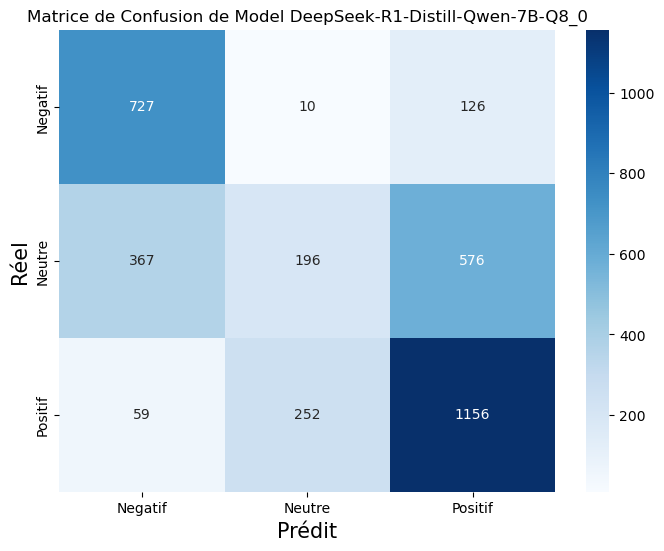

✅ Matrice de confusion enregistrée dans : Results/confusion_matrix.png


<Figure size 640x480 with 0 Axes>

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

output_dir = "Results/"

# Évaluation des Résultats
y_true = comments_df["Sentiments"]
y_pred = comments_df["Sentiment_Predicted"]

# Calcul des métriques
accuracy = accuracy_score(y_true, y_pred) * 100  # Pourcentage
precision = precision_score(y_true, y_pred, average=None) * 100
recall = recall_score(y_true, y_pred, average=None) * 100

# Générer la matrice de confusion
labels = ["Negatif", "Neutre", "Positif"]
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Titres et labels
plt.title("Matrice de Confusion de Model DeepSeek-R1-Distill-Qwen-7B-Q8_0", fontsize=12)
plt.xlabel("Prédit", fontsize=15)
plt.ylabel("Réel", fontsize=15)
plt.show()

# Sauvegarde de la Matrice
confusion_matrix_path = os.path.join(output_dir, "confusion_matrix.png")
plt.savefig(confusion_matrix_path)
print(f"✅ Matrice de confusion enregistrée dans : {confusion_matrix_path}")

In [37]:
# Affichage des résultats
print(f"\n✅ Accuracy du modèle sur l'ensemble de test : {round(accuracy, 2)} %\n")
report = classification_report(y_true, y_pred)
print(report)


✅ Accuracy du modèle sur l'ensemble de test : 59.93 %

              precision    recall  f1-score   support

     Negatif       0.63      0.84      0.72       863
      Neutre       0.43      0.17      0.25      1139
     Positif       0.62      0.79      0.70      1467

    accuracy                           0.60      3469
   macro avg       0.56      0.60      0.55      3469
weighted avg       0.56      0.60      0.55      3469



In [38]:
# Enregistrement des Résultats
metrics_path = os.path.join(output_dir, "metrics_results.txt")
annotated_csv_path = os.path.join(output_dir, "comments_annotated.csv")

with open(metrics_path, "w") as f:
    f.write(f"🔍 Évaluation des Sentiments\n")
    f.write("=" * 50 + "\n")
    f.write(f"\n✅ Accuracy du modèle sur l'ensemble de test : {round(accuracy, 2)} %\n\n")
    f.write(report)

# Sauvegarde du DataFrame annoté
comments_df.to_csv(annotated_csv_path, index=False)

print(f"\n✅ Annotation terminée ! Résultats enregistrés dans : {annotated_csv_path}")
print(f"✅ Scores des métriques enregistrés dans : {metrics_path}")


✅ Annotation terminée ! Résultats enregistrés dans : Results/comments_annotated.csv
✅ Scores des métriques enregistrés dans : Results/metrics_results.txt


# ----------------------------------------------------------------

In [19]:
# 📌 Load Mistral-7B-Instruct-v0.3 GGUF Model
model_path = "models/Mistral-7B-Instruct-v0.3.fp16.gguf"

In [20]:
import pandas as pd
from llama_cpp import Llama
from tqdm import tqdm

llm = Llama(model_path=model_path, n_gpu_layers=50, n_ctx=4096, n_batch=32)  # Adjust GPU layers if needed

llama_model_loader: loaded meta data with 25 key-value pairs and 291 tensors from models/Mistral-7B-Instruct-v0.3.fp16.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = models--mistralai--Mistral-7B-Instruc...
llama_model_loader: - kv   2:                          llama.block_count u32              = 32
llama_model_loader: - kv   3:                       llama.context_length u32              = 32768
llama_model_loader: - kv   4:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.attention.head_count u32              = 32
llama_model_loader: - kv   7:        

In [21]:
SYSTEM_MESSAGE_SENTIMENT = (
    "You are a sentiment classification assistant. Your task is to analyze the sentiment of a comment "
    "and classify it into one of three categories: 'Positif', 'Negatif', or 'Neutre'.\n\n"
    "### Sentiment Classification Rules:\n"
    "- **Positif**: If the comment expresses satisfaction, praise, or something good.\n"
    "- **Negatif**: If the comment expresses dissatisfaction, criticism, or a complaint or a something not good.\n"
    "- **Neutre**: If the comment is vague, neutral, or lacks strong sentiment.\n\n"
    "### Instructions:\n"
    "1. Read the comment carefully.\n"
    "2. Return only one of the three labels: **Positif, Negatif, or Neutre**.\n"
    "3. Do NOT provide explanations.\n\n"
    "### Supported Languages:\n"
    "- Arabic (including Algerian Darija)\n"
    "- French\n"
    "- English\n\n"
    "### Example:\n"
    "- **Comment:** 'أنترنت مليحة'\n"
    "- **Output:** 'Positif'\n"
    "- **Comment:** 'الخدمة سيئة جدا وبطيئة'\n"
    "- **Output:** 'Negatif'\n"
    "- **Comment:** 'هل يوجد عرض جديد؟'\n"
    "- **Output:** 'Neutre'\n"
)

In [25]:
# 📌 Function to Predict Sentiment
def classify_sentiment(comment):
    if not isinstance(comment, str) or comment.strip() == "":
        return "Neutre"  # Default for empty comments
    
    prompt = f"{SYSTEM_MESSAGE_SENTIMENT}\n\nComment: {comment}\nSentiment:"
    
    response = llm(prompt, max_tokens=5, stop=["\n"])
    sentiment = response["choices"][0]["text"].strip()
    
    # Ensure output is one of the three classes
    if sentiment not in ["Positif", "Negatif", "Neutre"]:
        return "Neutre"
    
    return sentiment

In [26]:
# 📌 Apply Sentiment Classification with Progress Bar
tqdm.pandas()
comments_df["Sentiment_Predicted"] = comments_df["Comments"].progress_apply(classify_sentiment)

  0%|          | 0/3487 [00:00<?, ?it/s]Llama.generate: 307 prefix-match hit, remaining 254 prompt tokens to eval
llama_perf_context_print:        load time =  134621.40 ms
llama_perf_context_print: prompt eval time =   73947.73 ms /   273 tokens (  270.87 ms per token,     3.69 tokens per second)
llama_perf_context_print:        eval time =    2844.20 ms /     3 runs   (  948.07 ms per token,     1.05 tokens per second)
llama_perf_context_print:       total time =   61926.00 ms /   276 tokens
  0%|          | 2/3487 [01:01<29:58:39, 30.97s/it]Llama.generate: 307 prefix-match hit, remaining 22 prompt tokens to eval
llama_perf_context_print:        load time =  134621.40 ms
llama_perf_context_print: prompt eval time =    5077.10 ms /    22 tokens (  230.78 ms per token,     4.33 tokens per second)
llama_perf_context_print:        eval time =    2941.92 ms /     3 runs   (  980.64 ms per token,     1.02 tokens per second)
llama_perf_context_print:       total time =    8021.36 ms /    25

In [31]:
# 📌 Save the Annotated Data
output_path = "Results/Comments_Annotated_Mistral-7B.csv"
comments_df.to_csv(output_path, index=False)

print(f"✅ Sentiment annotation completed! Results saved to {output_path}")

✅ Sentiment annotation completed! Results saved to Results/Comments_Annotated_Mistral-7B.csv
